In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [10]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\beta$"," $\\gamma$", "$\\sigma$", "$\\nu$"]

fixed = [False, True, True, False, True, False]

beta_permutations = [[10.5, 2.0, -0.15, 0.0, 0.2, 0.0] , [10.5, 2.0, 0.0, 0.0, 0.2, 0.0] , [10.5, 2.0, 0.15, 0.0, 0.2, 0.0]] 

### first the alpha permutations

In [11]:
beta1 = jsm_mcmc.Chain("../../../data/remote_pull/curvature/beta_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

beta2 = jsm_mcmc.Chain("../../../data/remote_pull/curvature/beta_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

beta3 = jsm_mcmc.Chain("../../../data/remote_pull/curvature/beta_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

In [12]:
# chain_labels = ["$\\alpha = $" + beta1.constraints[0] + "\n $\\sigma = $" + beta1.constraints[1] + "\n $\\beta = $" + beta1.constraints[2],
#                 "$\\alpha = $" + beta2.constraints[0] + "\n $\\sigma = $" + beta2.constraints[1] + "\n $\\beta = $" + beta2.constraints[2],
#                 "$\\alpha = $" + beta3.constraints[0] + "\n $\\sigma = $" + beta3.constraints[1] + "\n $\\beta = $" + beta3.constraints[2]]

In [13]:
chain_labels = ["$\\beta$ = -0.15", "$\\beta$ = 0.0", "$\\beta$ = +0.15"]

In [16]:
data = [beta1.clean, beta2.clean, beta3.clean]
fid_values = [[2.0, -0.15, 0.2], [2.0, 0.0, 0.2], [2.0, 0.15, 0.2]]

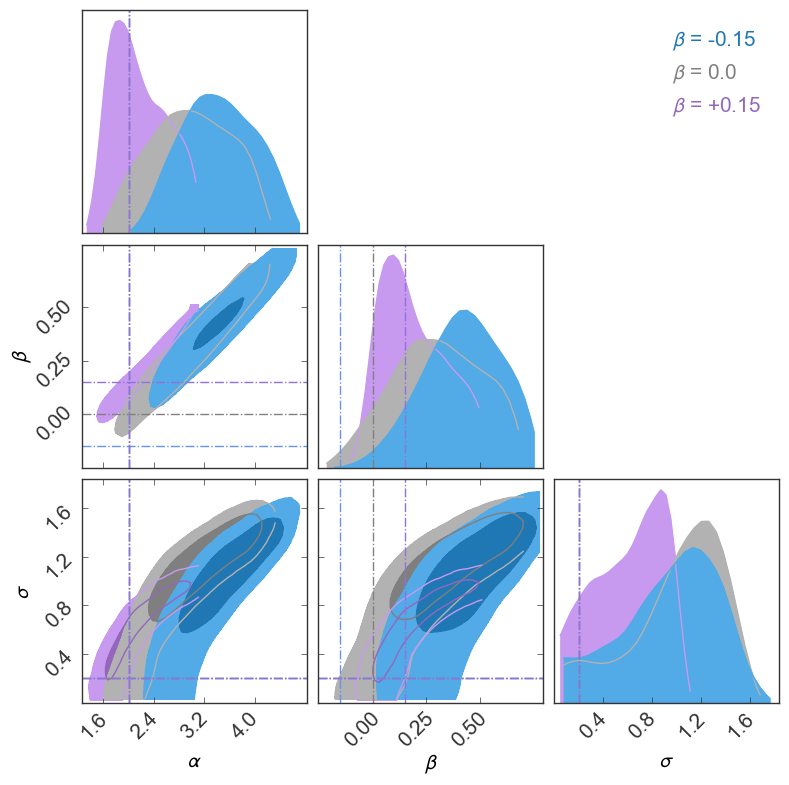

In [17]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(filledPlots=True, nContourLevels=2, smoothingKernel=1.5, truths=fid_values, truthLineStyles=["-."]*3,
                      colorsOrder=["blues", "grays", "purples"], truthColors=["cornflowerblue", "grey", "mediumpurple"])#, paramRanges=[[1.5, 5], [-0.4, 1], [0, 2]])
#, plotName="../../../paper_1/figures/updated/s30_alpha_fidstart.pdf")